# Scottish Gazeetter

The full Scottis Gazetter dataset has 21 directories (see bellow the list of directories) - one directory per book. 

All of these books correspond of the 11 collections of Scottish gazeeter. 

Each directory contains the information of each book and holds: 1) a metadata file (METS xml file per book) and 2) an ALTO subdirectory with all the pages (an ALTO xml file per page) of a the corresponding book: 

List of directories:
- 97343436: Gazetteer of Scotland - 1803 - Newman.326
- 97414570: Gazetteer of Scotland - 1806 - A.122.c
- 97421702: Gazetteer of Scotland - 1825? - R.237.i
- 97350713: Descriptive account of the principal towns in Scotland - 1828
- 97424370: Gazetteer of Scotland - 1838, Volume 1 - NF.1461.g.7
- 97430830: Gazetteer of Scotland - 1838, Volume 2 - NF.1461.g.7
- 97437554: Topographical, statistical, and historical gazetteer of Scotland - 1842, Volume 1  Map Room
- 97493971: Topographical, statistical, and historical gazetteer of Scotland - 1842, Volume 2  Map Room
- 97482042: Topographical dictionary of Scotland - 1846, Volume 1 - Map.Ref.C18
- 97361137: Topographical dictionary of Scotland - 1846, Volume 2 - Map.Ref.C18
- 97448598: Topographical, statistical, and historical gazetteer of Scotland - 1848, Volume 2 - Map Room
- 97459138: Imperial gazeteer of Scotland, or, Dictionary of Scottish topography - 1868, Volume 1
- 97470686: Imperial gazeteer of Scotland, or, Dictionary of Scottish topography - 1868, Volume 2
- 97355229: Gazetteer of Scotland - 1882 - Map.Ref.C18
- 97368774: Ordnance gazetteer of Scotland - 1884-1885, Volume 1 - Map.Ref.C18
- 97372786: Ordnance gazetteer of Scotland - 1884-1885, Volume 2 - Map.Ref.C18
- 97376462: Ordnance gazetteer of Scotland - 1884-1885, Volume 3 - Map.Ref.C18
- 97380354: Ordnance gazetteer of Scotland - 1884-1885, Volume 4 - Map.Ref.C18
- 97383958: Ordnance gazetteer of Scotland - 1884-1885, Volume 5 - Map.Ref.C18
- 97387610: Ordnance gazetteer of Scotland - 1884-1885, Volume 6 - Map.Ref.C18
- 97393254: Ordnance gazetteer of Scotland - 1901 - Map.Ref.C18

List of collections:
- Gazetteer of Scotland - 1803:
    - 1 Volume
- Gazetteer of Scotland - 1806
    - 1 Volume
- Gazetteer of Scotland - 1825
    - 1 Volume
- Descriptive account of the principal towns in Scotland - 1828
    - 1 Volume
- Gazetteer of Scotland - 1838
    - 2 Volumes
- Topographical, statistical, and historical gazetteer of Scotland - 1842
    - 2 Volumes
- Topographical dictionary of Scotland - 1846
    - 2 Volumes
- Topographical, statistical, and historical gazetteer of Scotland - 1848
    - Only Volume 2 (?)
- Imperial gazeteer of Scotland, or, Dictionary of Scottish topography - 1868
    - 2 Volumes
- Gazetteer of Scotland - 1882 
    - 1 Volume
- Ordnance gazetteer of Scotland - 1884-1885
    - 7 Volumes

 

### Loading the necessary libraries

In [13]:
import yaml
from IPython.core.display import display, HTML
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

### Functions

In [2]:
def read_query_results(filename):
    with open('./results_Gazetteer/'+filename, 'r') as f:
        query_results = yaml.load(f)
    return query_results


In [3]:
def plot_norm(publication, element):
    plt.figure(figsize=(18,6))
    num_element={}
    years=set()
    for year in publication:
        if element == "words":
            num_element[year]=publication[year][2]
        elif element == "pages":
            num_element[year]=publication[year][1]
        else:
            num_element[year]=publication[year][0]
        years.add(year)  
    plt.plot(*zip(*sorted(num_element.items())), label=element, lw = 2, alpha = 1, marker="X")
    plt.xticks(sorted(list(years)), rotation=50) 
    plt.ticklabel_format(style = 'plain')
    plt.legend(loc='upper right')
    plt.ylabel('Number of ' + element + 'per volumne')
    plt.xlabel("Years")
    plt.show()
    return num_element, years

In [4]:
# Plot two lines with different scales on the same plot
def cumulative_plot(element1, element2, num_element1, num_element2, years):
    fig = plt.figure(figsize=(12, 6))
    line_weight = 3
    alpha = .5
    ax1 = fig.add_axes([0, 0, 1, 1])
    ax1.set_xticks(sorted(list(years))) 
    ax2 = fig.add_axes()# This is the magic that joins the x-axis
    ax2 = ax1.twinx()
    lns1 = ax1.plot(*zip(*sorted(num_element1.items())), color='blue', lw=line_weight, alpha=alpha, label=element1, marker='d')
    lns2 = ax2.plot(*zip(*sorted(num_element2.items())), color='orange', lw=line_weight, alpha=alpha, label=element2, marker='s')
    leg = lns1 + lns2
    labs = [l.get_label() for l in leg]
    ax1.legend(leg, labs, loc=0)
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=50 )
    plt.title('Cumulative yearly '+ element1 +' & '+ element2)  
    plt.show()

## 1. Normalised Query

First we need to run the normalised query, to know how many documents, pages and words we have per year of eddition. 

* spark-submit --py-files defoe.zip defoe/run_query.py nls-gazetteersOfScotland.txt nls defoe.nls.queries.normalize -r results_norm_gaz -n 16


Note: nls-gazetteersOfScotland.txt contains the path of all downloaded dataset:
        
        XXXX/nls-data-gazetteersOfScotland/97350713
        XXXX/nls-data-gazetteersOfScotland/97355229
        XXXX/nls-data-gazetteersOfScotland/97361137
        XXXX/nls-data-gazetteersOfScotland/97368774
        XXXX/nls-data-gazetteersOfScotland/97372786
        XXXX/nls-data-gazetteersOfScotland/97376462
        XXXX/nls-data-gazetteersOfScotland/97380354
        XXXX/nls-data-gazetteersOfScotland/97383958
        XXXX/nls-data-gazetteersOfScotland/97387610
        XXXX/nls-data-gazetteersOfScotland/97393254
        XXXX/nls-data-gazetteersOfScotland/97414570
        XXXX/nls-data-gazetteersOfScotland/97421702
        XXXX/nls-data-gazetteersOfScotland/97424370
        XXXX/nls-data-gazetteersOfScotland/97430830
        XXXX/nls-data-gazetteersOfScotland/97437554
        XXXX/nls-data-gazetteersOfScotland/97448598
        XXXX/nls-data-gazetteersOfScotland/97459138
        XXXX/nls-data-gazetteersOfScotland/97470686
        XXXX/nls-data-gazetteersOfScotland/97482042
        XXXX/nls-data-gazetteersOfScotland/97493971


And now we are going to examine the results of the normalization query to see the total number of documents, pages and words published over the years.

The query return the results in this format:

    {
      <YEAR>: [<NUM_BOOKS>, <NUM_PAGES>, <NUM_WORDS>],
      ...
    }

In [5]:
norm_publication=read_query_results('results_norm_gaz')
sorted(norm_publication.items())

[(1803, [1, 606, 429137]),
 (1806, [1, 594, 426808]),
 (1825, [1, 222, 182032]),
 (1828, [1, 376, 83346]),
 (1838, [2, 1098, 865559]),
 (1842, [2, 1798, 2221435]),
 (1846, [2, 1302, 1520380]),
 (1848, [1, 878, 1093503]),
 (1868, [2, 1908, 2181484]),
 (1882, [1, 492, 389159]),
 (1883, [6, 2038, 2516567]),
 (1901, [1, 1776, 2481536])]

In order to set the scene and visualize how the books/documents, pages and words grew over the time, we are going to plot three basic graphs:        
- number of books over time per year
- number of pages over time per year
- number of words over time per year

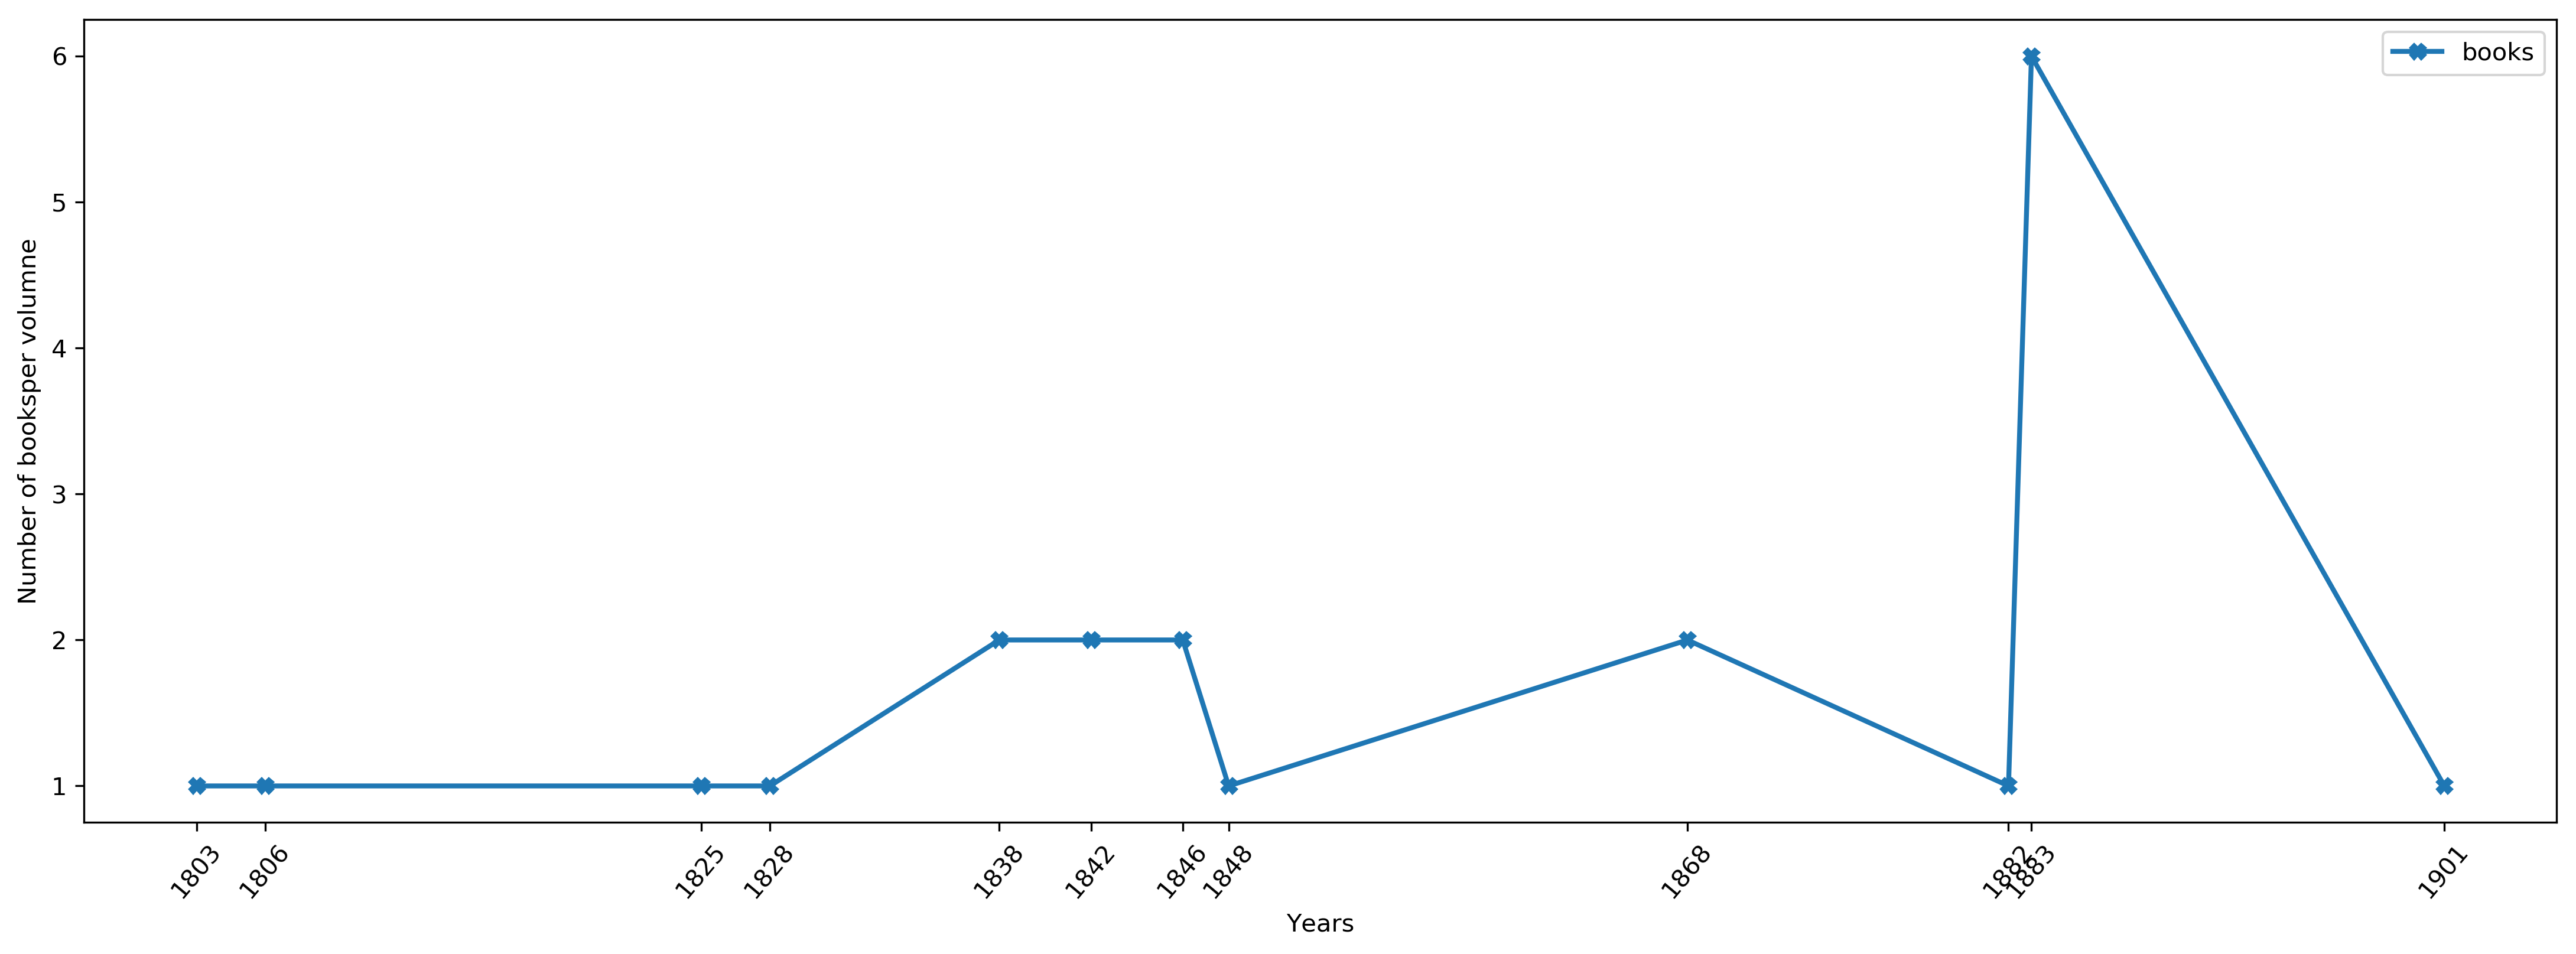

In [14]:
#Plot the variation of number of documents per volumme 
mpl.rcParams['figure.dpi']=300
num_books, doc_years = plot_norm(norm_publication, "books")

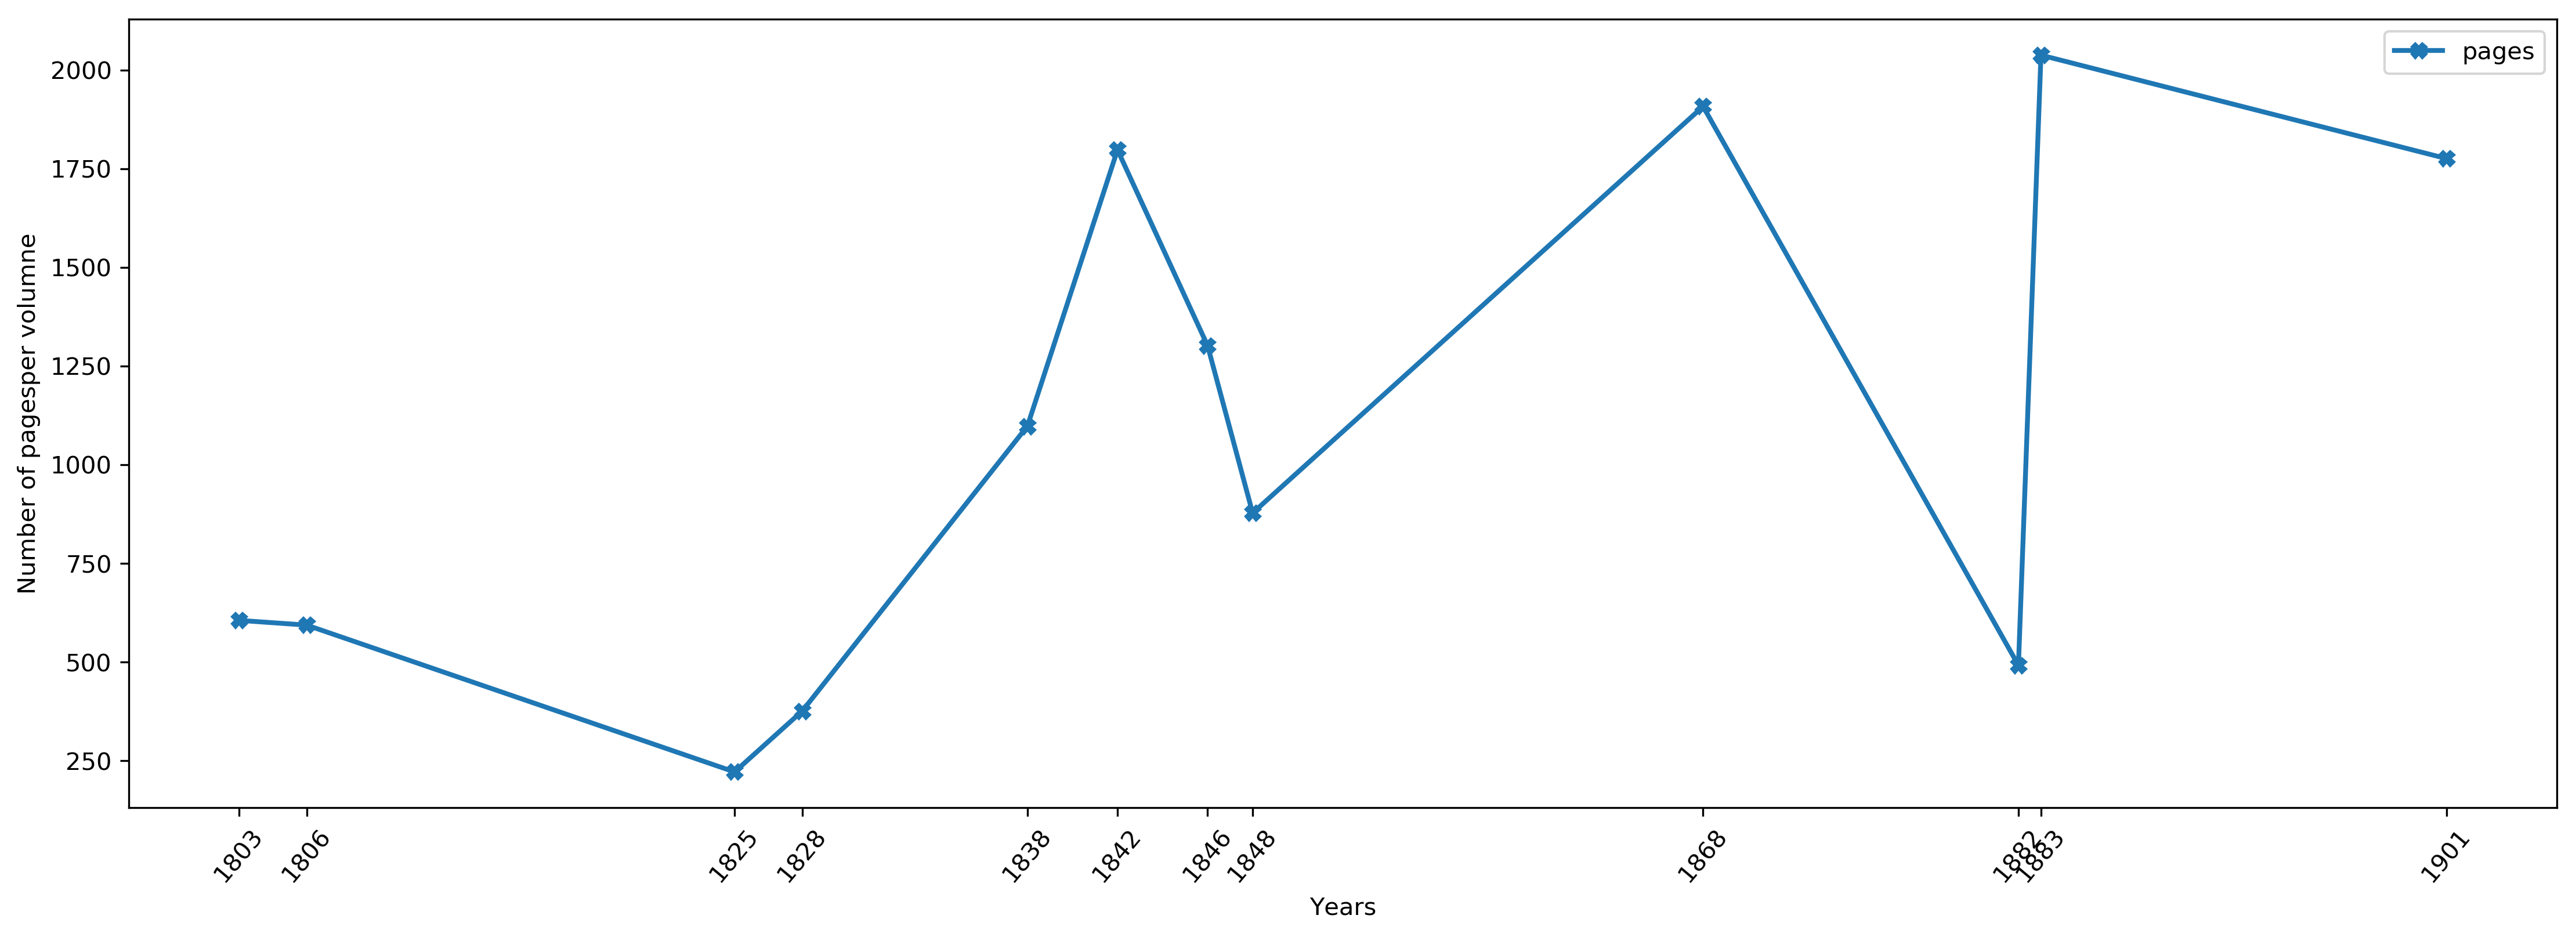

In [15]:
#Plot the variation of number of pages per volumme 
num_pages, pages_years = plot_norm(norm_publication, "pages")

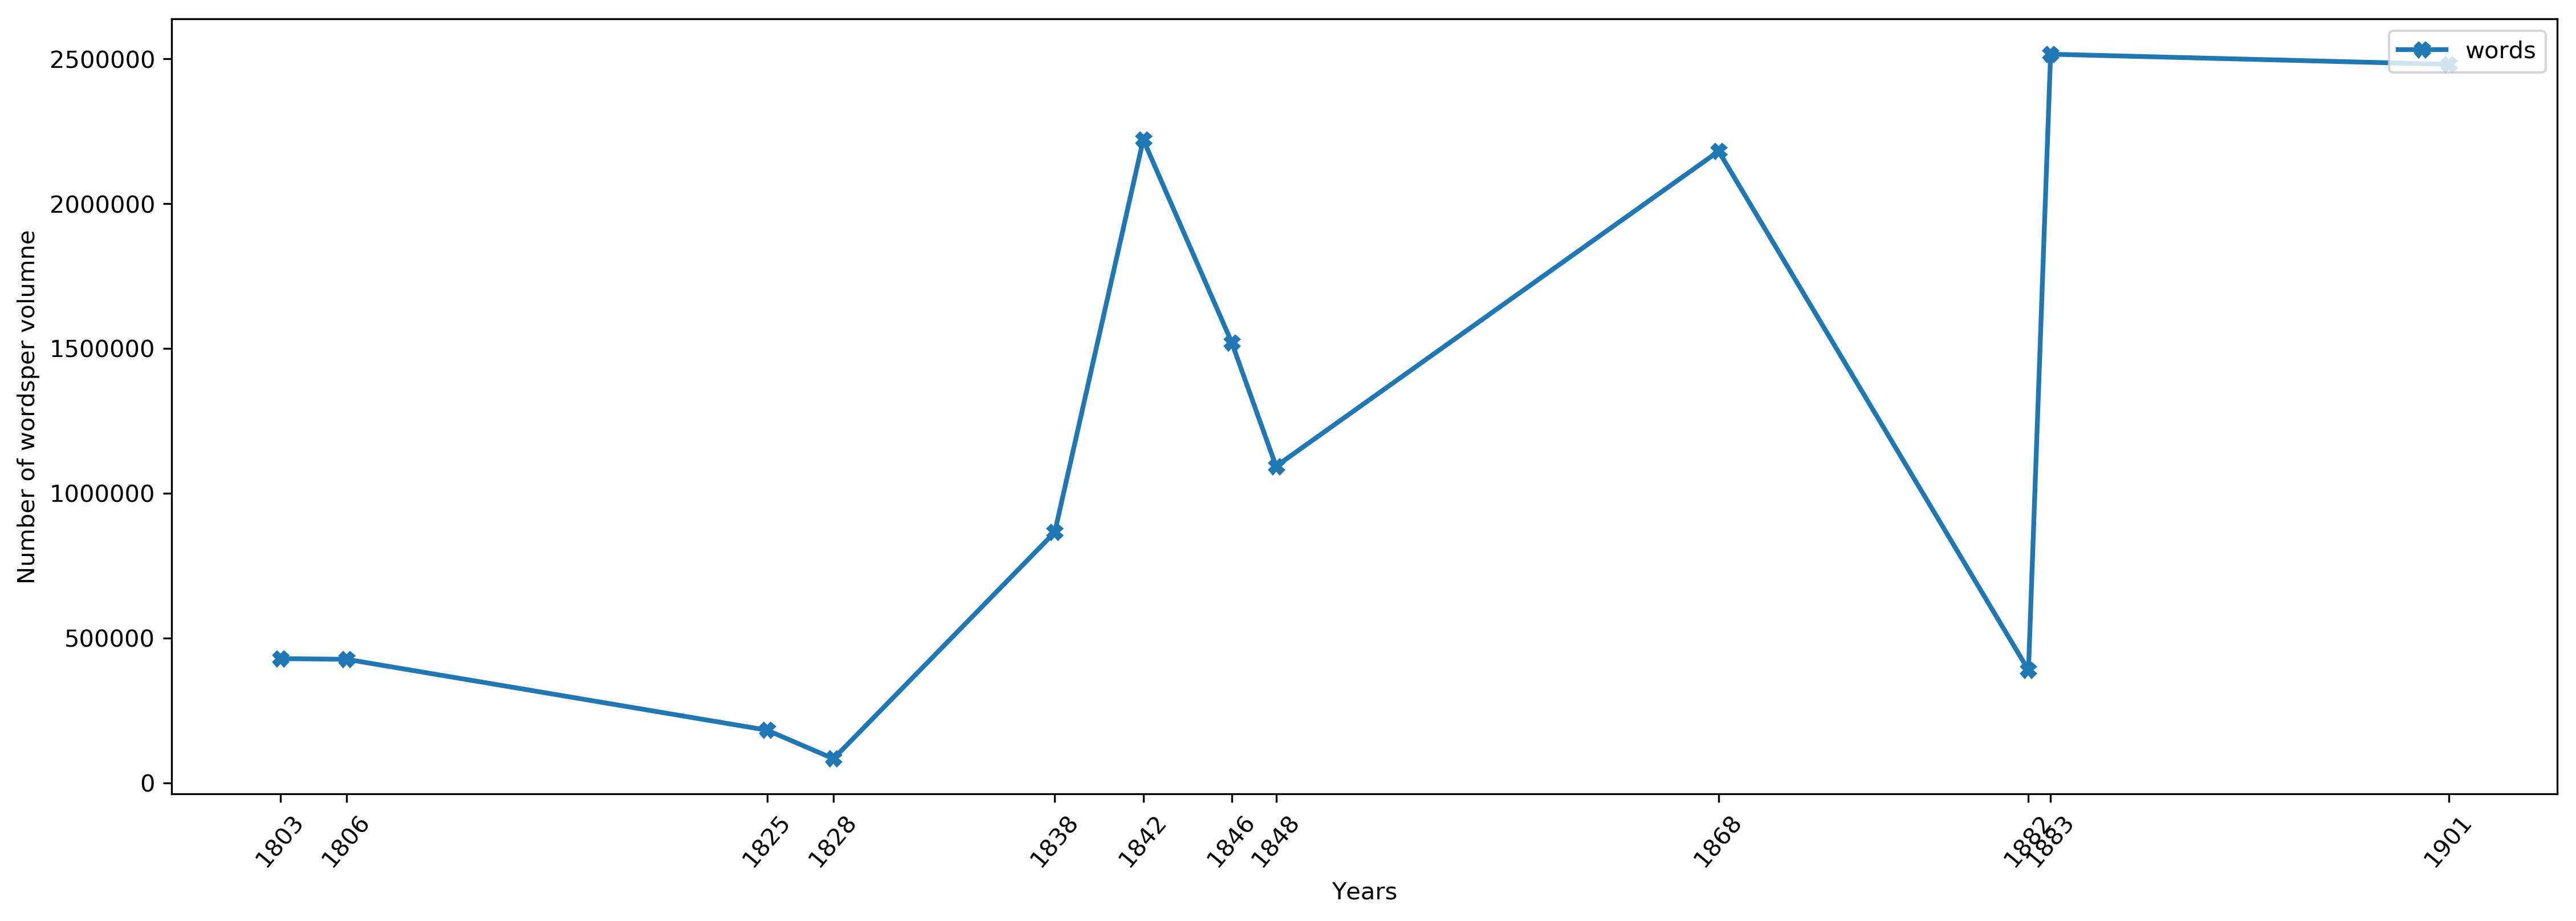

In [16]:
#Plot the variation of number of words per volumme 
num_words, words_years = plot_norm(norm_publication, "words")

And now we are going to visualize in the same figure the previous frequencies [books| pages| words], by ploting two frequencies together each time. Notice that each frequency has a different scale


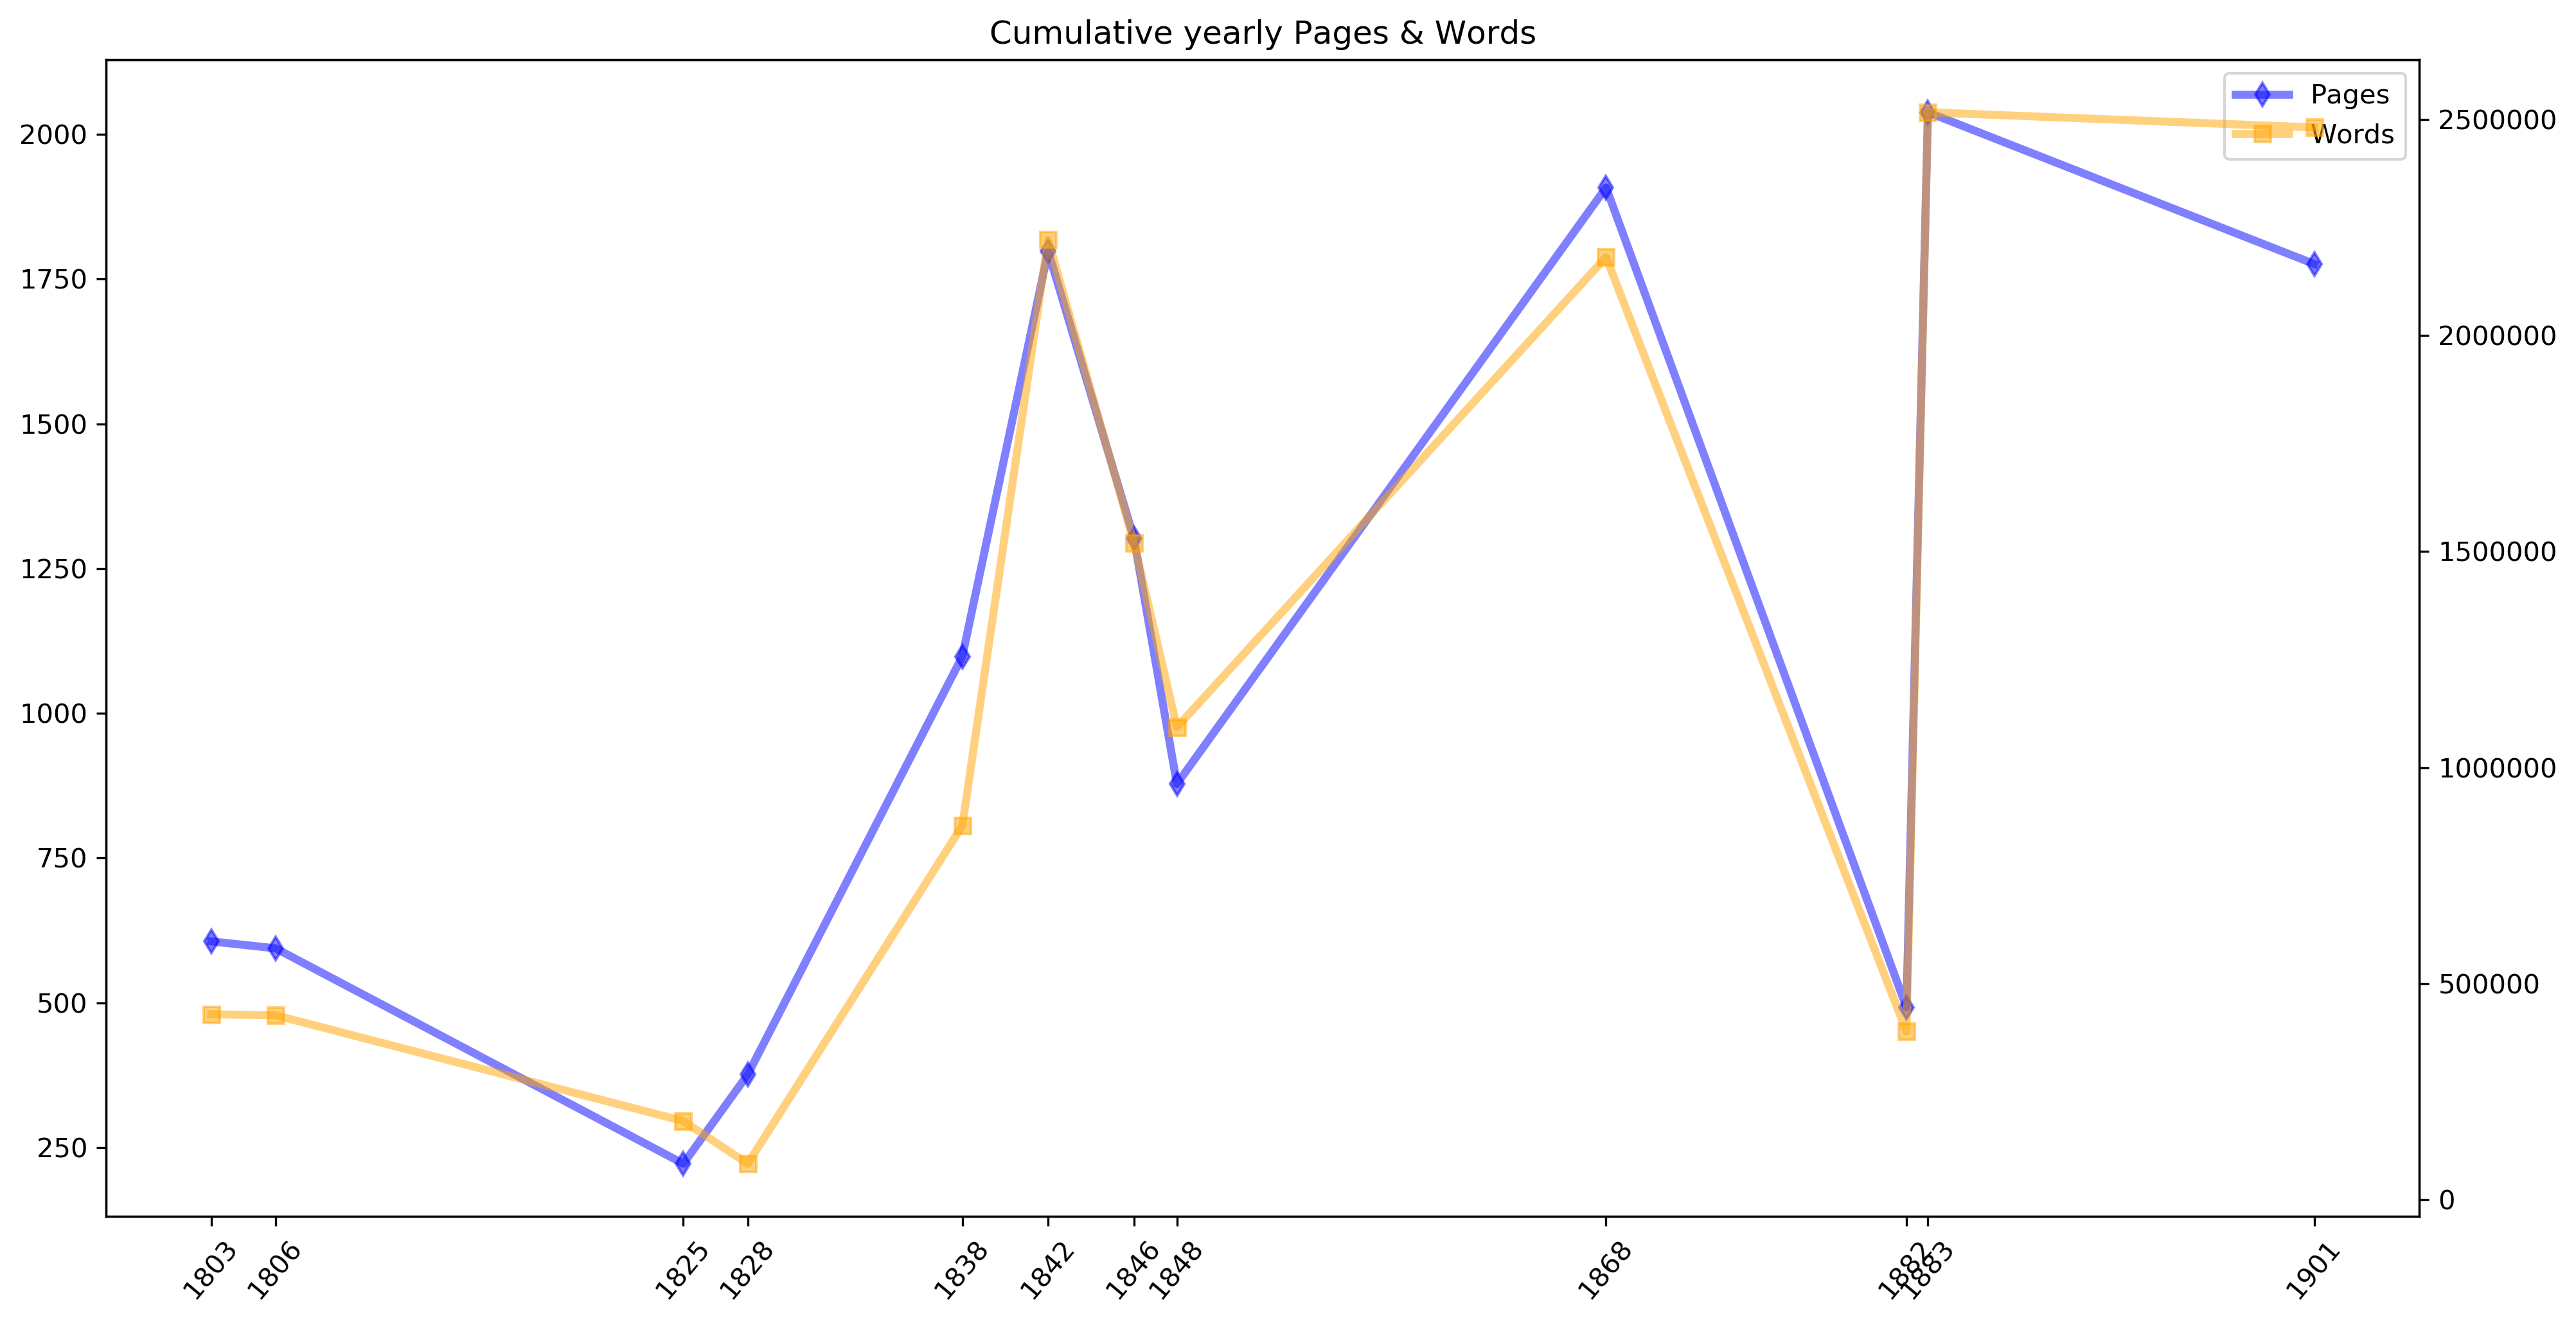

In [17]:
# Plot Pages and Words frequencies with different scales on the same plot
cumulative_plot("Pages", "Words", num_pages, num_words, words_years)

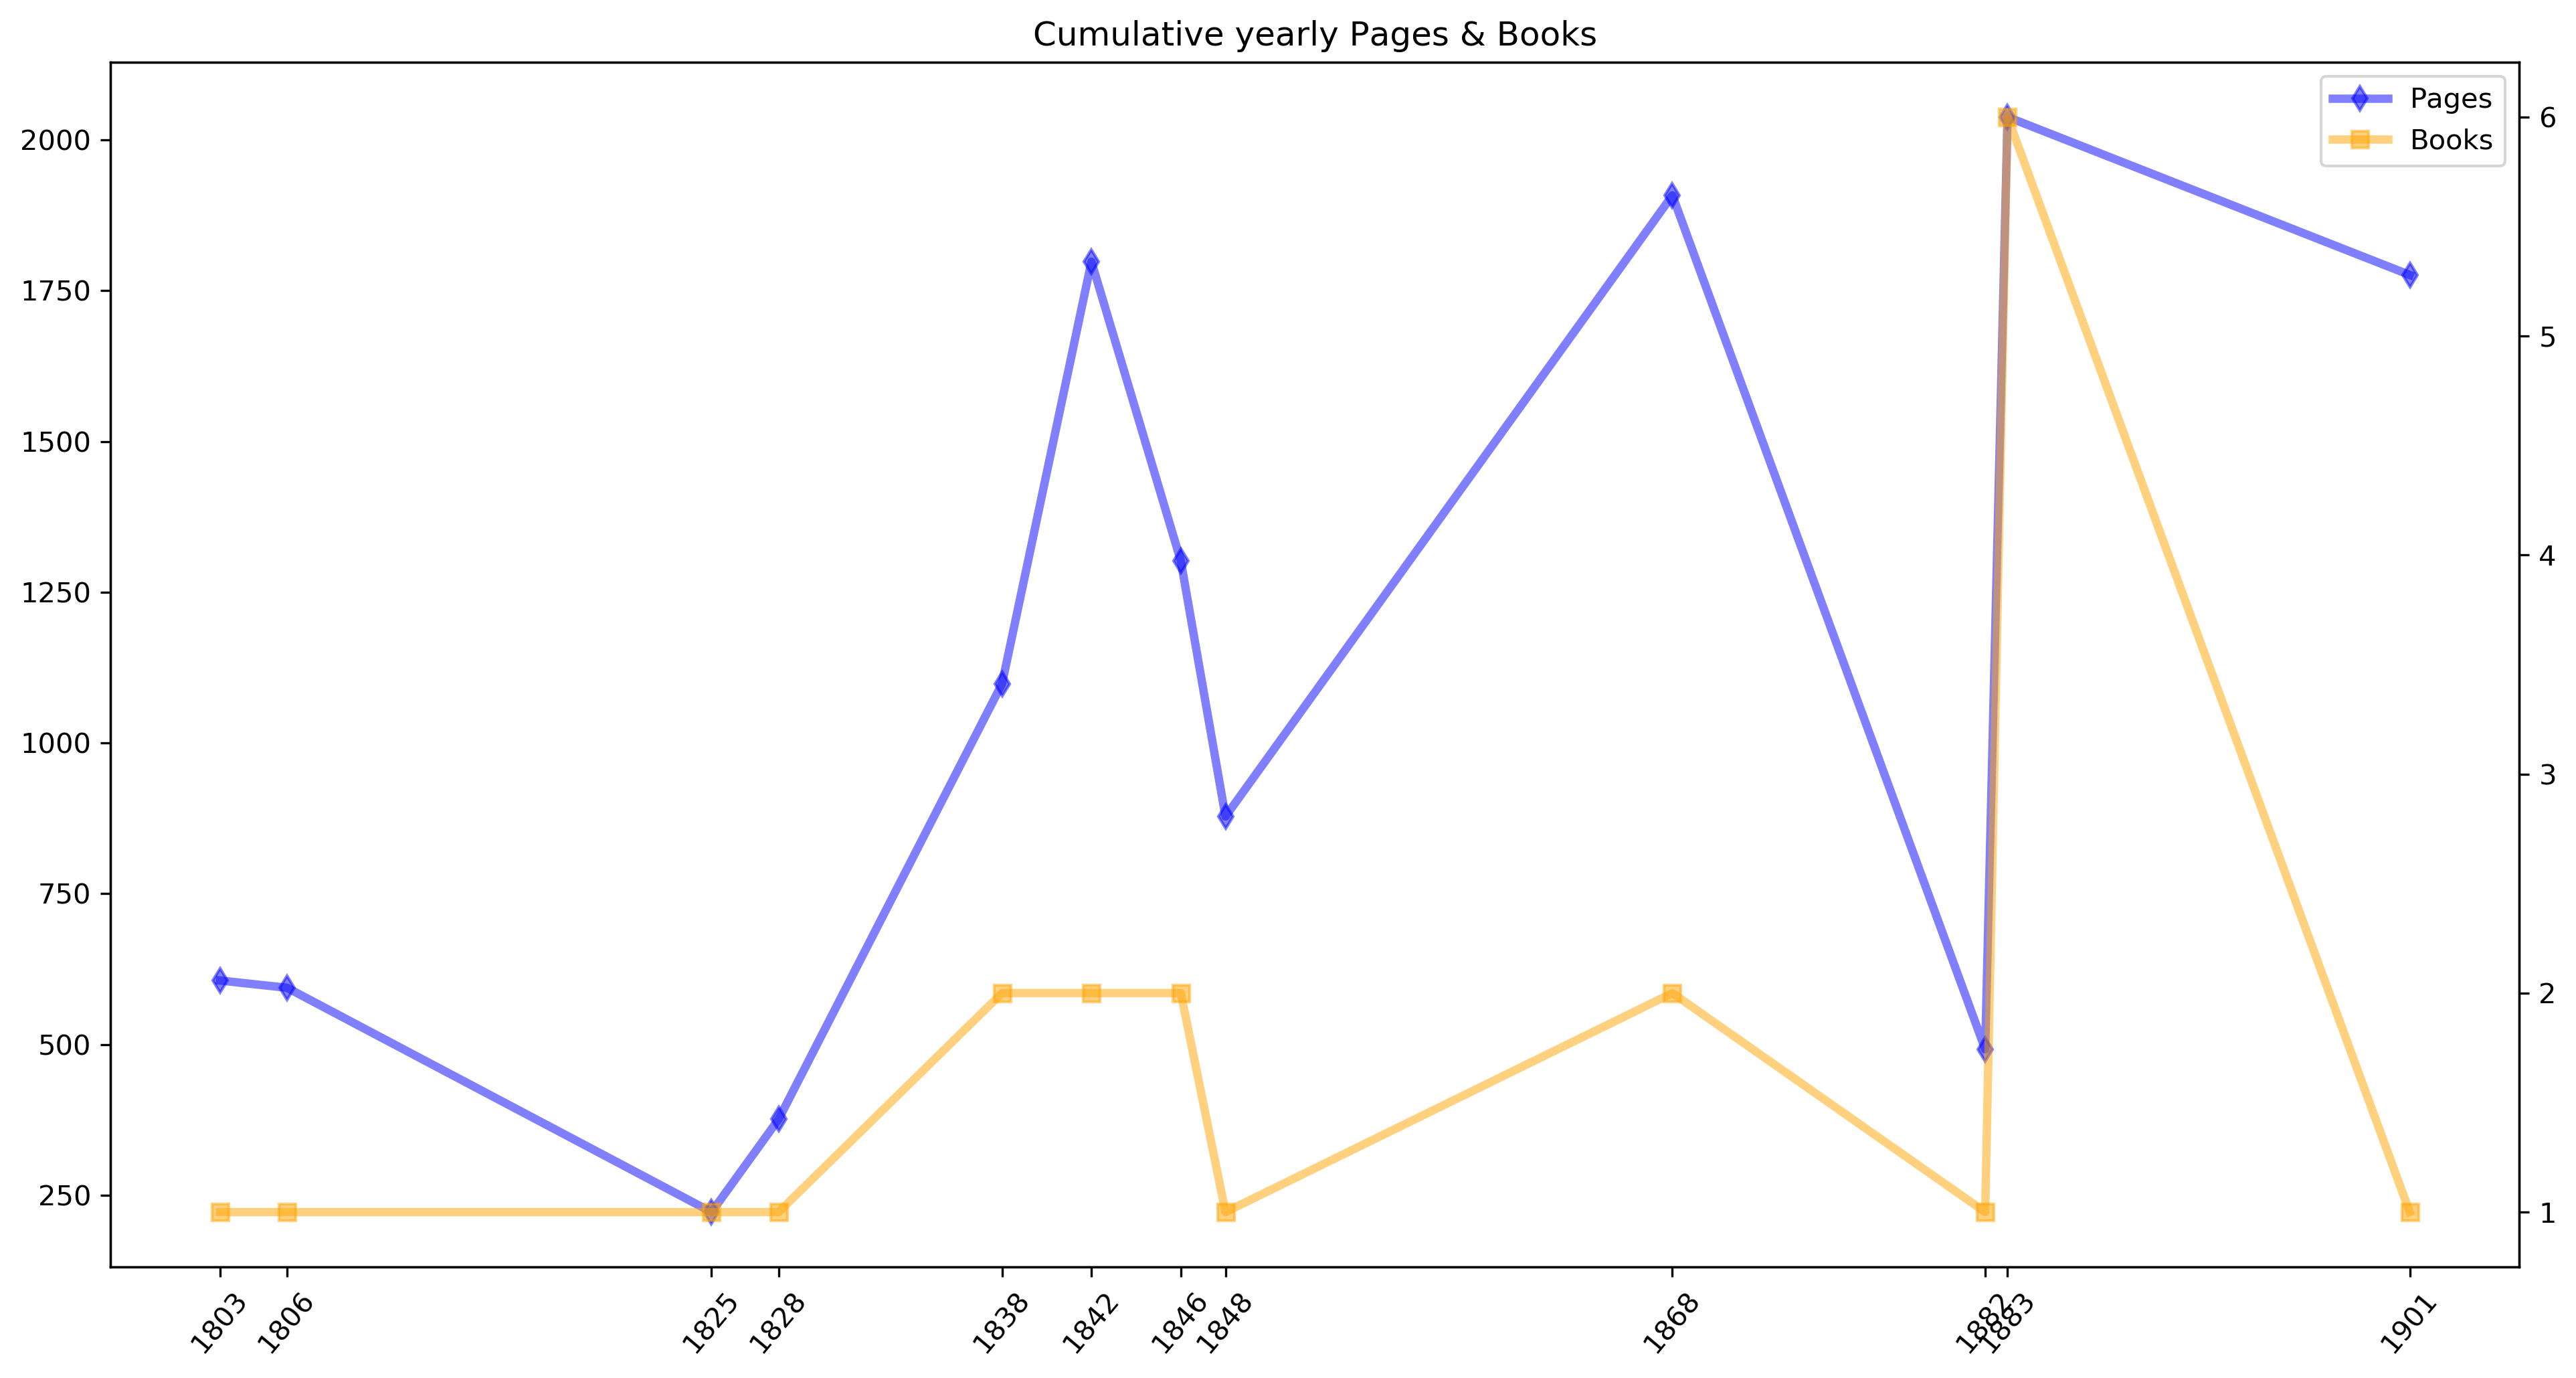

In [18]:
# Plot Pages and Documents frequencies with different scales on the same plot
cumulative_plot("Pages", "Books", num_pages, num_books, doc_years)

## 2. Exploring in which years were pubished each editions

We have noticed that an eddition could be published across years (including suplements). For that reason, we have run a query, called inventory_per_year, which aggregates per year the the title and ediditon of each document.

( Query: spark-submit --py-files defoe.zip defoe/run_query.py nls-gazetteersOfScotland.txt nls defoe.nls.queries.inventory_per_year -r results_inventory_per_year -n 324 )

The results of this query can be found at this repository: results_Gazetteer/results_inventory_per_year

Now, we are going to calculate for each of the eight edditions, the years in which were published.


In [19]:
inventory_results=read_query_results('results_inventory_per_year')
for year_inv in inventory_results:
    print ("Year: %s - Title: %s" %(year_inv, inventory_results[year_inv][0][0]))
    for publication in inventory_results[year_inv]: 
        print(" ---> Edition: %s" %publication[1])

Year: 1825 - Title: Gazetteer of Scotland; arranged under the various descriptions of counties, parishes, islands
 ---> Edition: 1825?
Year: 1828 - Title: Descriptive account of the principal towns in Scotland: to accompany Wood's town atlas
 ---> Edition: 1828
Year: 1868 - Title: imperial gazetteer of Scotland; or, Dictionary of Scottish topography, compiled from the most recent authorities, and forming a complete body of Scottish geography, physical, statistical, and historical
 ---> Edition: 1868, Volume 1
 ---> Edition: 1868, Volume 2
Year: 1901 - Title: Ordnance gazetteer of Scotland
 ---> Edition: 1901
Year: 1806 - Title: gazetteer of Scotland: containing a particular and concise description of the counties, parishes, islands, cities ... With ... map
 ---> Edition: 1806
Year: 1842 - Title: topographical, statistical, and historical gazetteer of Scotland
 ---> Edition: 1842, Volume 1
 ---> Edition: 1842, Volume 2
Year: 1838 - Title: gazetteer of Scotland. [With plates and maps.]
 